Created By- Garvit Kumar Arya

Date- 11 July 2020 

In [ ]:
%%capture
pip install ipython-autotime

In [ ]:
%load_ext autotime

time: 91 µs (started: 2021-04-11 20:42:50 +00:00)


In [ ]:
from keras import layers
from keras import models

time: 1.4 s (started: 2021-04-11 20:42:50 +00:00)


Checking availability of GPU

In [ ]:
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

time: 735 ms (started: 2021-04-11 20:42:59 +00:00)


In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


time: 5.1 s (started: 2021-04-11 20:43:07 +00:00)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Preparing the data

Encoding the integer sequences into a binary matrix


In [ ]:
import numpy as np

def vector_sequence(sequences,  dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i][sequence] = 1.
  return results

time: 2.58 ms (started: 2021-04-11 20:43:43 +00:00)


In [ ]:
x_train = vector_sequence(train_data)
x_test = vector_sequence(test_data)

time: 2.77 s (started: 2021-04-11 20:43:47 +00:00)


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

time: 1.67 ms (started: 2021-04-11 20:43:57 +00:00)


### Building your network

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

time: 4.55 s (started: 2021-04-11 20:44:11 +00:00)


### Compiling the model

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics

# model.compile(optimizer='rmsprop',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])

model.compile(optimizer= optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])


time: 19.8 ms (started: 2021-04-11 20:44:38 +00:00)


### Validating the approach

Setting aside a validation set


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

time: 1.74 ms (started: 2021-04-11 20:44:45 +00:00)


### Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size = 64,
                    epochs = 20,
                    validation_data = (x_val, y_val))

Epoch 1/20
235/235 [==============================] - 5s 7ms/step - loss: 0.4683 - binary_accuracy: 0.7949 - val_loss: 0.2860 - val_binary_accuracy: 0.8843
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1971 - binary_accuracy: 0.9267 - val_loss: 0.2963 - val_binary_accuracy: 0.8832
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1413 - binary_accuracy: 0.9494 - val_loss: 0.3149 - val_binary_accuracy: 0.8857
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1099 - binary_accuracy: 0.9644 - val_loss: 0.3574 - val_binary_accuracy: 0.8838
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0838 - binary_accuracy: 0.9713 - val_loss: 0.4152 - val_binary_accuracy: 0.8765
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0639 - binary_accuracy: 0.9784 - val_loss: 0.4603 - val_binary_accuracy: 0.8753
Epoch 7/20
235/235 [==============================] - 1s 5ms/ste

In [ ]:
history_dic = history.history
history_dic.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

time: 6.37 ms (started: 2021-04-11 20:45:36 +00:00)


### Plotting the training and validation loss

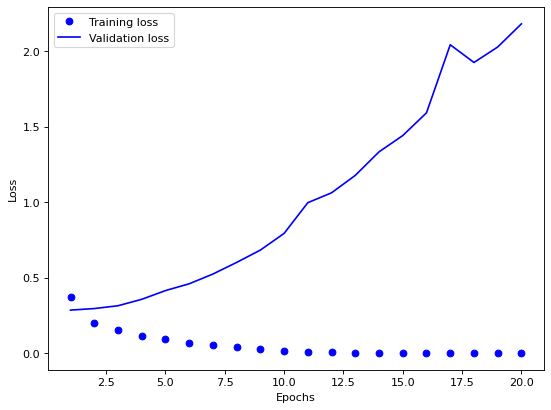

time: 168 ms (started: 2021-04-11 20:45:39 +00:00)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

history_dic = history.history

acc = history_dic['binary_accuracy']
val_acc = history_dic['val_binary_accuracy']

loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Plotting the training and validation accuracy

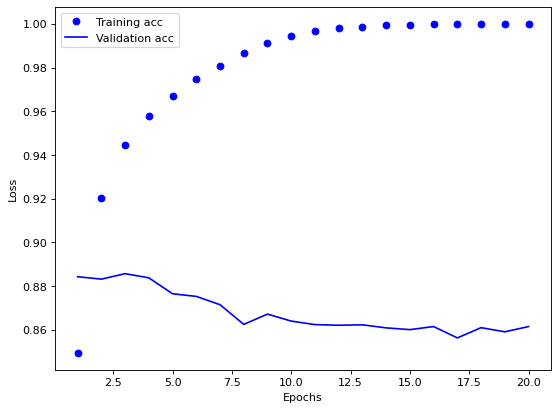

time: 167 ms (started: 2021-04-11 20:45:50 +00:00)


In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)

196/196 [==============================] - 1s 4ms/step - loss: 2.3968 - binary_accuracy: 0.8429
time: 1.37 s (started: 2021-04-11 20:46:05 +00:00)


In [ ]:
print("test loss, test acc:", results)

test loss, test acc: [2.3968381881713867, 0.8428800106048584]
time: 1.15 ms (started: 2021-04-11 20:46:10 +00:00)


In [ ]:
pred = model.predict(x_test)
pred

array([[1.69536941e-06],
       [1.00000000e+00],
       [9.09825030e-04],
       ...,
       [3.81697163e-07],
       [1.04523025e-01],
       [2.42555156e-01]], dtype=float32)

time: 1.43 s (started: 2021-04-11 20:46:19 +00:00)
